In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("failure.csv")

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
df["date"]=pd.to_datetime(df["date"])
df["day"]=(df["date"]).dt.day
df["month"]=(df["date"]).dt.month
df["year"]=(df["date"]).dt.year

In [8]:
del df["date"]

In [9]:
df.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month,year
0,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,1,1,2015
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,1,1,2015
2,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,1,1,2015
3,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,1,1,2015
4,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,1,1,2015


In [10]:
df["year"].value_counts()

2015    124494
Name: year, dtype: int64

In [12]:
df["year"].nunique()

1

In [13]:
del df["year"]

In [14]:
df.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month
0,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,1,1
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,1,1
2,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,1,1
3,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,1,1
4,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,1,1


In [15]:
df.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,day,month
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622,0.002994,0.000321
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122,-0.000239,-0.005613
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736,-0.010000,-0.006416
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366,-0.004232,-0.001101
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069,-0.008383,-0.005490
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949,0.009526,-0.014129
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152,0.019483,0.138159
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861,0.009194,0.020576
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861,0.009194,0.020576
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000,-0.012316,-0.025383


In [16]:
abs(df.corr()["failure"].sort_values(ascending=False))

failure       1.000000
attribute7    0.119055
attribute8    0.119055
attribute4    0.067398
attribute2    0.052902
day           0.002994
attribute5    0.002270
attribute1    0.001984
attribute9    0.001622
month         0.000321
attribute6    0.000550
attribute3    0.000948
Name: failure, dtype: float64

In [17]:
#7 ve 8 aynı etki gösteriyor değerleri aynı ise birini çıkaracağız

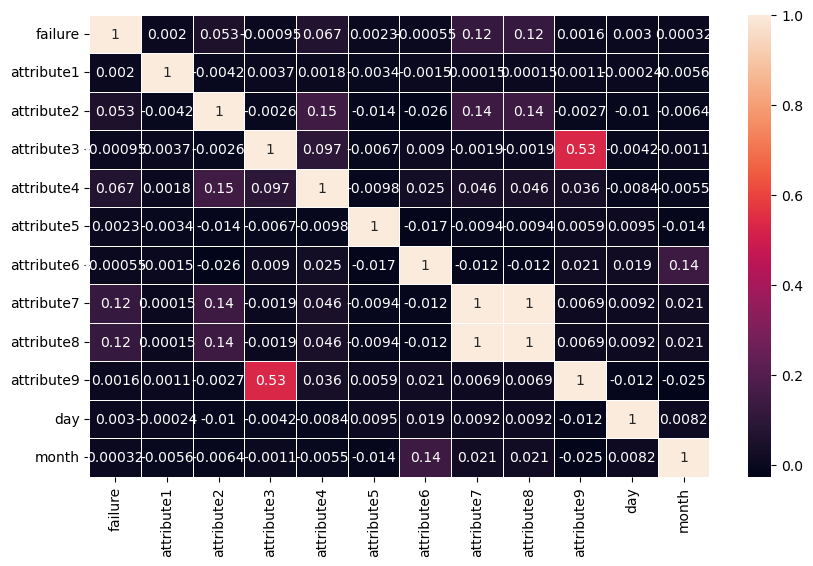

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,linewidths=.5);

In [21]:
del df["attribute8"]

In [22]:
df.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,day,month
0,S1F01085,0,215630672,56,0,52,6,407438,0,7,1,1
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0,1,1
2,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,1,1
3,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,1,1
4,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,1,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   device      124494 non-null  object
 1   failure     124494 non-null  int64 
 2   attribute1  124494 non-null  int64 
 3   attribute2  124494 non-null  int64 
 4   attribute3  124494 non-null  int64 
 5   attribute4  124494 non-null  int64 
 6   attribute5  124494 non-null  int64 
 7   attribute6  124494 non-null  int64 
 8   attribute7  124494 non-null  int64 
 9   attribute9  124494 non-null  int64 
 10  day         124494 non-null  int64 
 11  month       124494 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 11.4+ MB


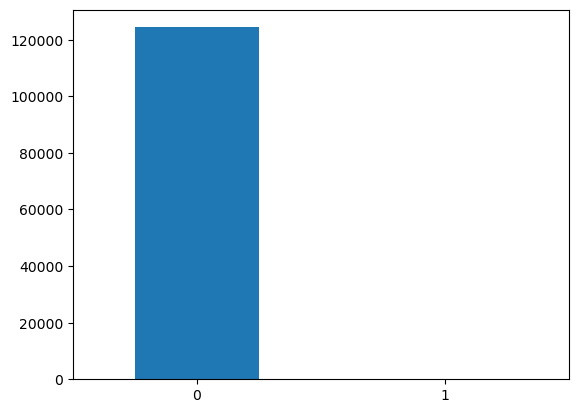

In [30]:
df["failure"].value_counts().plot.bar()
plt.xticks(rotation=360);

In [31]:
x=df.drop("failure",axis=1)
y=df[["failure"]]

In [32]:
x

,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,day,month
0,S1F01085,215630672,56,0,52,6,407438,0,7,1,1
1,S1F0166B,61370680,0,3,0,6,403174,0,0,1,1
2,S1F01E6Y,173295968,0,0,0,12,237394,0,0,1,1
3,S1F01JE0,79694024,0,0,0,6,410186,0,0,1,1
4,S1F01R2B,135970480,0,0,0,15,313173,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
124489,Z1F0MA1S,18310224,0,0,0,10,353705,8,0,2,11
124490,Z1F0Q8RT,172556680,96,107,4,11,332792,0,13,2,11
124491,Z1F0QK05,19029120,4832,0,0,11,350410,0,0,2,11
124492,Z1F0QL3N,226953408,0,0,0,12,358980,0,0,2,11


In [33]:
y

,failure
0,0
1,0
2,0
3,0
4,0
...,...
124489,0
124490,0
124491,0
124492,0


In [34]:
x=pd.get_dummies(df,drop_first=True)

In [35]:
x

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,day,month,device_S1F013BB,device_S1F0166B,device_S1F01E6Y,device_S1F01JE0,device_S1F01R2B,device_S1F01TD5,device_S1F01XDJ,device_S1F023H2,device_S1F02A0J,device_S1F02DZ2,device_S1F02EVN,device_S1F02L38,device_S1F02MGA,device_S1F02P76,device_S1F02VAX,device_S1F02W1L,device_S1F02WFT,device_S1F02XLX,device_S1F0318A,device_S1F0322R,device_S1F0330P,device_S1F03499,device_S1F035SJ,device_S1F0377V,device_S1F039FE,device_S1F03RV3,device_S1F03YZM,device_S1F044ET,device_S1F049RX,device_S1F04DH8,device_S1F04KSC,device_S1F04MVQ,device_S1F04R7Y,device_S1F04TS4,device_S1F04Y6C,device_S1F059G0,device_S1F05AFP,device_S1F05B1Q,device_S1F05NAJ,...,device_Z1F1652D,device_Z1F1653X,device_Z1F16BR1,device_Z1F16G31,device_Z1F16LDN,device_Z1F17XPD,device_Z1F17YTD,device_Z1F17Z3N,device_Z1F17ZCN,device_Z1F18YB3,device_Z1F18YST,device_Z1F1901P,device_Z1F19ENW,device_Z1F19KMH,device_Z1F19QH0,device_Z1F19QM3,device_Z1F19TP2,device_Z1F19TVX,device_Z1F19VF5,device_Z1F1A0CJ,device_Z1F1A0LM,device_Z1F1A0RP,device_Z1F1A1HH,device_Z1F1A7MG,device_Z1F1A83K,device_Z1F1AD0M,device_Z1F1AF54,device_Z1F1AFF2,device_Z1F1AFT5,device_Z1F1AG5N,device_Z1F1AGLA,device_Z1F1AGN5,device_Z1F1AGW1,device_Z1F1B6H4,device_Z1F1B6NP,device_Z1F1B799,device_Z1F1CZ35,device_Z1F1FCH5,device_Z1F1FZ9J,device_Z1F1HEQR,device_Z1F1HSWK,device_Z1F1Q9BD,device_Z1F1R76A,device_Z1F1RE71,device_Z1F1RJFA,device_Z1F1VMZB,device_Z1F1VQFY,device_Z1F26YZB,device_Z1F282ZV,device_Z1F2PBHX
0,0,215630672,56,0,52,6,407438,0,7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,61370680,0,3,0,6,403174,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,173295968,0,0,0,12,237394,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,79694024,0,0,0,6,410186,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,135970480,0,0,0,15,313173,0,3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,0,18310224,0,0,0,10,353705,8,0,2,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
124490,0,172556680,96,107,4,11,332792,0,13,2,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
124491,0,19029120,4832,0,0,11,350410,0,0,2,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
124492,0,226953408,0,0,0,12,358980,0,0,2,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    from sklearn.ensemble import GradientBoostingClassifier
    
    import imblearn
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced

    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
              
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    G=GradientBoostingClassifier()
      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=13)
    
    
    algos=[g,b,KN,SVC,D,R,Log,XGB,G]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier','GradientBoostingClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    RUS=RandomUnderSampler(random_state=42)
    x_RUS,y_RUS=RUS.fit_resample(x_train,y_train)
    
    for item in algos:

        #item.fit(x_RUS,y_RUS)
        predict=item.fit(x_RUS,y_RUS).predict(x_test)
        
        
        accuracy_scored.append(accuracy_score(y_test,predict))
        precision_scored.append(precision_score(y_test,predict))
        recall_scored.append(recall_score(y_test,predict))
        f1_scored.append(f1_score(y_test,predict))

    result=pd.DataFrame(columns=['accuracy_score','f1_score','recall_score','precision_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    
    return result.sort_values('accuracy_score',ascending=False)  

In [38]:
#sürekli hata aldığım için başka birisinden kopyaladım imblearn kütüphanesini 

In [39]:
classification_funct(x,y)

,accuracy_score,f1_score,recall_score,precision_score
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000
XGBClassifier,1.000000,1.000000,1.000000,1.000000
GradientBoostingClassifier,1.000000,1.000000,1.000000,1.000000
BernoulliNB,0.992000,0.229102,1.000000,0.129371
RandomForestClassifier,0.991775,0.224242,1.000000,0.126280
GaussianNB,0.990939,0.020833,0.081081,0.011952
SVC,0.645868,0.002895,0.432432,0.001452
KNeighborsClassifier,0.490265,0.002264,0.486486,0.001135
LogisticRegression,0.001189,0.002375,1.000000,0.001189
